Notebook to generate tables to be used in the model pipeline

In [1]:
import pandas as pd
import numpy as np

from CMP_functions.preprocessing import *

In [2]:
table = '../data/images_info_table.csv'

ft = 'tissue'
split_on = 'Breast'

name = 'Breast'

In [3]:
df = pd.read_csv(table)

In [4]:
df

,im_id,master_id,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,...,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers,SIDM
0,1877-8278,1877,SU-DHL-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,1331038,ACH-000656,SUDHL8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2207,NaN,DSMZ:ACC-573,SIDM00423
1,1476-8001,1476,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624,SIDM01081
2,1068-8758,1068,PCI-4B,PCI-04B;PCI-4M,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,1298531,ACH-002297,PCI4B_UPPER_AERODIGESTIVE_TRACT,CVCL_C171,NaN,Unknown:Unknown,SIDM00043
3,2195-8403,2195,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,East Asian,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403,SIDM00585
4,162,162,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,White,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104,SIDM00540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,706-9149,706,HO-1-N-1,Nakata-1,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,924111,ACH-002244,HO1N1_UPPER_AERODIGESTIVE_TRACT,CVCL_1284,NaN,JCRB:JCRB0831,SIDM00592
732,153,153,SK-MEL-31,AX-Mel,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,909727,ACH-000640,SKMEL31_SKIN,CVCL_0600,NaN,ATCC:HTB-73,SIDM01104
733,1875-8232,1875,NCI-H1048,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,687995,ACH-000866,NCIH1048_LUNG,CVCL_1453,NaN,ATCC:CRL-5853,SIDM00654
734,2138-8023,2138,EC-GI-10,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,East Asian,Unknown,NaN,753555,ACH-000305,ECGI10_OESOPHAGUS,CVCL_1187,NaN,RIKEN:RCB0774,SIDM00278


In [28]:
df.columns

Index(['im_id', 'master_id', 'model_name', 'synonyms', 'model_type',
       'growth_properties', 'doi', 'pmed', 'model_treatment', 'model_comments',
       'msi_status', 'mutational_burden', 'ploidy', 'parent_id',
       'mutation_data', 'methylation_data', 'expression_data', 'cnv_data',
       'crispr_ko_data', 'fusion_data', 'drug_data', 'sample_id', 'tissue',
       'tissue_status', 'cancer_type', 'cancer_type_detail',
       'cancer_type_ncit_id', 'age_at_sampling', 'sampling_day',
       'sampling_month', 'sampling_year', 'sample_treatment',
       'sample_treatment_details', 'sample_site', 'tnm_t', 'tnm_n', 'tnm_m',
       'tnm_integrated', 'tumour_grade', 'patient_id', 'species', 'gender',
       'ethnicity', 'smoking_status', 'model_relations_comment', 'COSMIC_ID',
       'BROAD_ID', 'CCLE_ID', 'RRID', 'HCMI', 'suppliers', 'SIDM', 'ft'],
      dtype='object')

## Extract cancer status

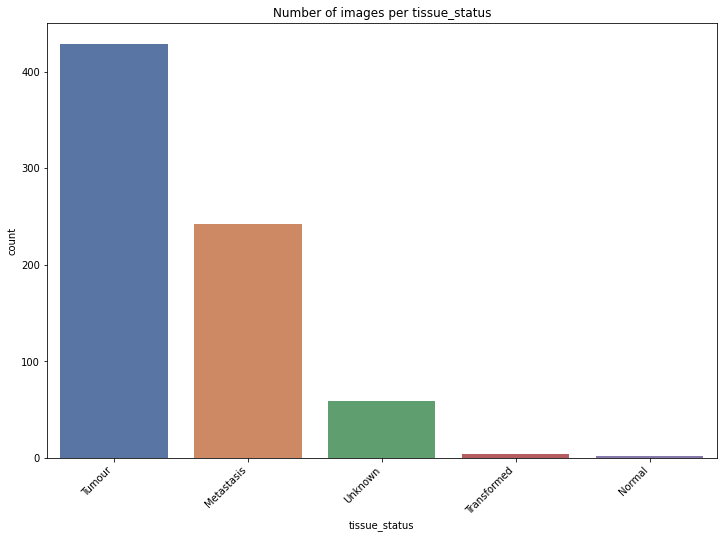

In [34]:
plot_ft_many(df, 'tissue_status')

In [50]:
tumor_df = df[df.tissue_status=="Tumour"]
metastasis_df = df[df.tissue_status=="Metastasis"]

In [51]:
status_df = pd.concat([tumor_df, metastasis_df])

In [52]:
set(status_df.tissue_status)

{'Metastasis', 'Tumour'}

In [53]:
status_df

,im_id,master_id,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,...,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers,SIDM,ft
1,1476-8001,1476,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624,SIDM01081,Not_Haematopoietic and Lymphoid
3,2195-8403,2195,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403,SIDM00585,Not_Haematopoietic and Lymphoid
4,162,162,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104,SIDM00540,Not_Haematopoietic and Lymphoid
5,924-8045,924,MOLP-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Unknown,NaN,1330950,ACH-000745,MOLP8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2124,NaN,DSMZ:ACC-569,SIDM00434,Haematopoietic and Lymphoid
7,1145,1145,U-2-OS,U20-S;2T,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,909776,ACH-000364,U2OS_BONE,CVCL_0042,NaN,ATCC:HTB-96,SIDM01191,Not_Haematopoietic and Lymphoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,382-8402,382,TE-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,1503371,ACH-000917,TE4_OESOPHAGUS,CVCL_3337,NaN,RIKEN:RCB2097,SIDM00250,Not_Haematopoietic and Lymphoid
728,1615-8947,1615,NCI-H345,NaN,Cell Line,Semi-Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,688021,ACH-001364,NCIH345_LUNG,CVCL_1558,NaN,ATCC:HTB-180,SIDM00719,Not_Haematopoietic and Lymphoid
729,1251-8747,1251,NUGC-3,NaN,Cell Line,Unknown,10.1007/BF02471470,NaN,NaN,NaN,...,Unknown,NaN,908455,ACH-000911,NUGC3_STOMACH,CVCL_1612,NaN,JCRB:JCRB0822,SIDM00572,Not_Haematopoietic and Lymphoid
733,1875-8232,1875,NCI-H1048,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,687995,ACH-000866,NCIH1048_LUNG,CVCL_1453,NaN,ATCC:CRL-5853,SIDM00654,Not_Haematopoietic and Lymphoid


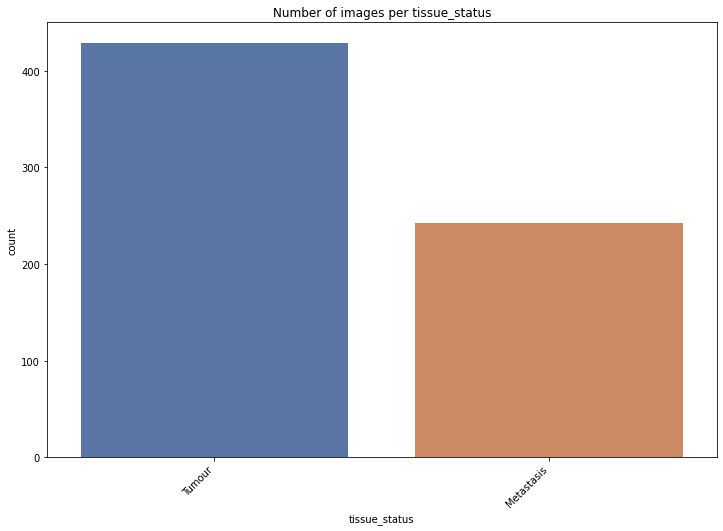

In [54]:
plot_ft_many(status_df, 'tissue_status')

In [59]:
status_df['ft'] = np.where(status_df['tissue_status']=="Tumour", "Tumour", "Metastasis")

In [60]:
status_df

,im_id,master_id,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,...,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers,SIDM,ft
1,1476-8001,1476,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624,SIDM01081,Tumour
3,2195-8403,2195,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403,SIDM00585,Tumour
4,162,162,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104,SIDM00540,Tumour
5,924-8045,924,MOLP-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Unknown,NaN,1330950,ACH-000745,MOLP8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2124,NaN,DSMZ:ACC-569,SIDM00434,Tumour
7,1145,1145,U-2-OS,U20-S;2T,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,909776,ACH-000364,U2OS_BONE,CVCL_0042,NaN,ATCC:HTB-96,SIDM01191,Tumour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,382-8402,382,TE-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,1503371,ACH-000917,TE4_OESOPHAGUS,CVCL_3337,NaN,RIKEN:RCB2097,SIDM00250,Metastasis
728,1615-8947,1615,NCI-H345,NaN,Cell Line,Semi-Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,688021,ACH-001364,NCIH345_LUNG,CVCL_1558,NaN,ATCC:HTB-180,SIDM00719,Metastasis
729,1251-8747,1251,NUGC-3,NaN,Cell Line,Unknown,10.1007/BF02471470,NaN,NaN,NaN,...,Unknown,NaN,908455,ACH-000911,NUGC3_STOMACH,CVCL_1612,NaN,JCRB:JCRB0822,SIDM00572,Metastasis
733,1875-8232,1875,NCI-H1048,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,NaN,687995,ACH-000866,NCIH1048_LUNG,CVCL_1453,NaN,ATCC:CRL-5853,SIDM00654,Metastasis


In [61]:
status_for_pip = status_df[['im_id','ft']]

In [62]:
status_for_pip

,im_id,ft
1,1476-8001,Tumour
3,2195-8403,Tumour
4,162,Tumour
5,924-8045,Tumour
7,1145,Tumour
...,...,...
725,382-8402,Metastasis
728,1615-8947,Metastasis
729,1251-8747,Metastasis
733,1875-8232,Metastasis


In [64]:
status_for_pip.to_csv('status_table.csv', index=False)